# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# Your comment here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [5]:
websites["CHARSET"].value_counts()

UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
ISO-8859          1
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64

In [6]:
websites["WHOIS_STATEPRO"].value_counts()

CA                     372
None                   362
NY                      75
WA                      65
Barcelona               62
FL                      61
Arizona                 58
California              57
ON                      45
NV                      30
UT                      29
CO                      24
PA                      23
MA                      22
IL                      19
PANAMA                  19
NJ                      15
MO                      15
Ohio                    15
Queensland              14
Utah                    13
New York                11
VA                      10
TX                      10
Washington              10
Texas                    9
Quebec                   9
PRAHA                    8
GA                       8
DC                       8
                      ... 
ILOCOS NORTE R3          1
Novosibirskaya obl.      1
NEW YORK                 1
shandong                 1
Berlin                   1
NONE                     1
G

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [7]:
# Your code here
websites._get_numeric_data().corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


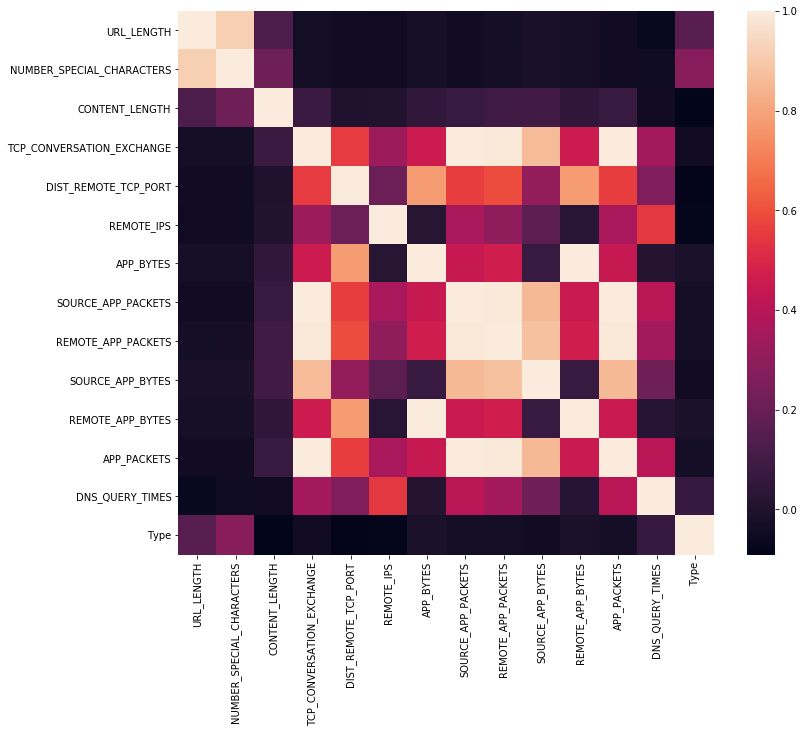

In [8]:
# Your comment here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(websites.corr())

Columnas relacionadas:
* APP_BYTES y REMOTE_APP_BYTES
* TCP_CONVERSATION_EXCHANGE, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, APP_PACKETS

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

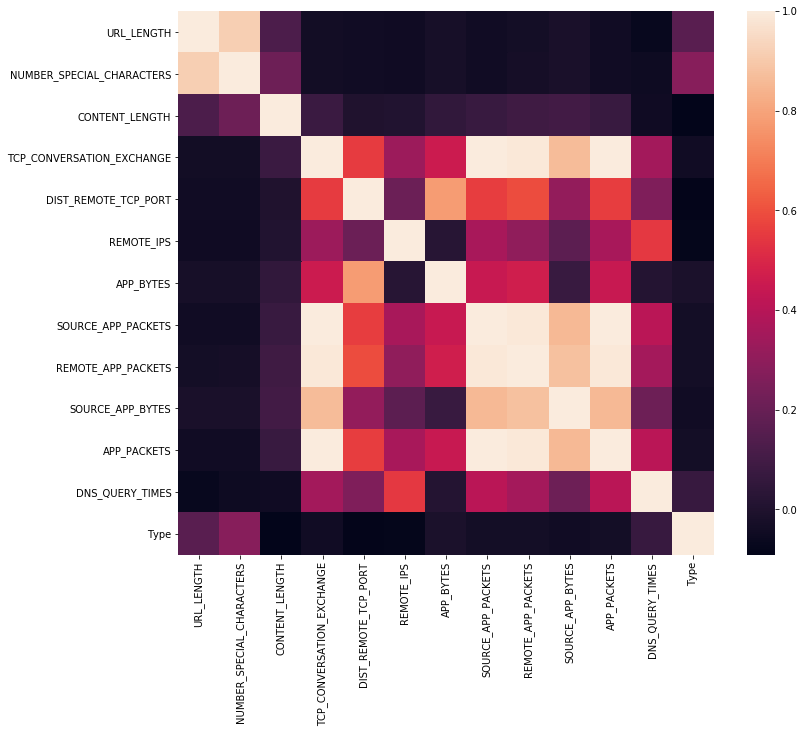

In [9]:
# Your code here
websites.drop(["REMOTE_APP_BYTES"], axis = 1, inplace = True)

plt.figure(figsize=(12,10))
sns.heatmap(websites.corr())

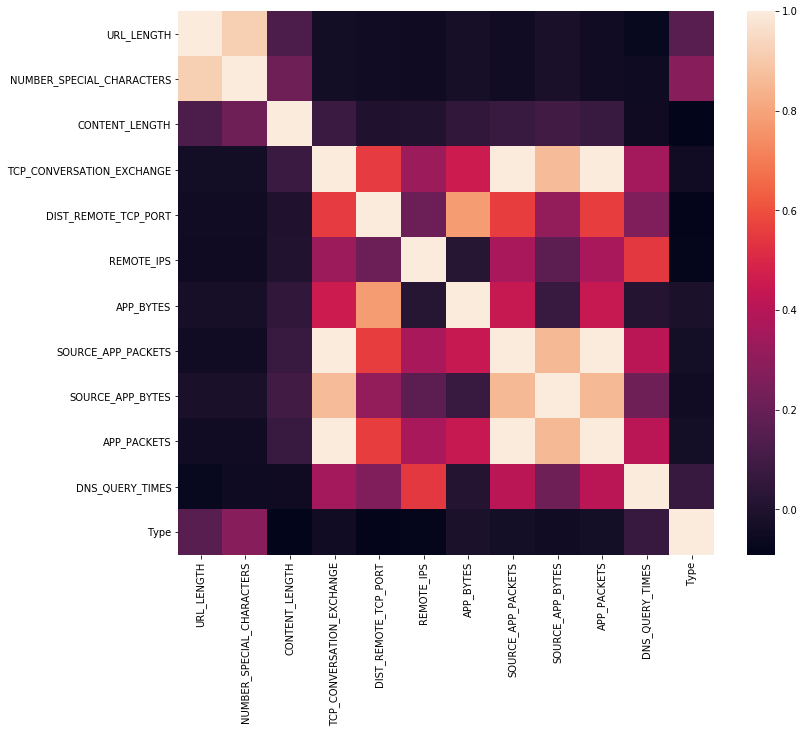

In [10]:
# Your comment here
websites.drop(["REMOTE_APP_PACKETS"], axis = 1, inplace = True)

plt.figure(figsize=(12,10))
sns.heatmap(websites.corr())

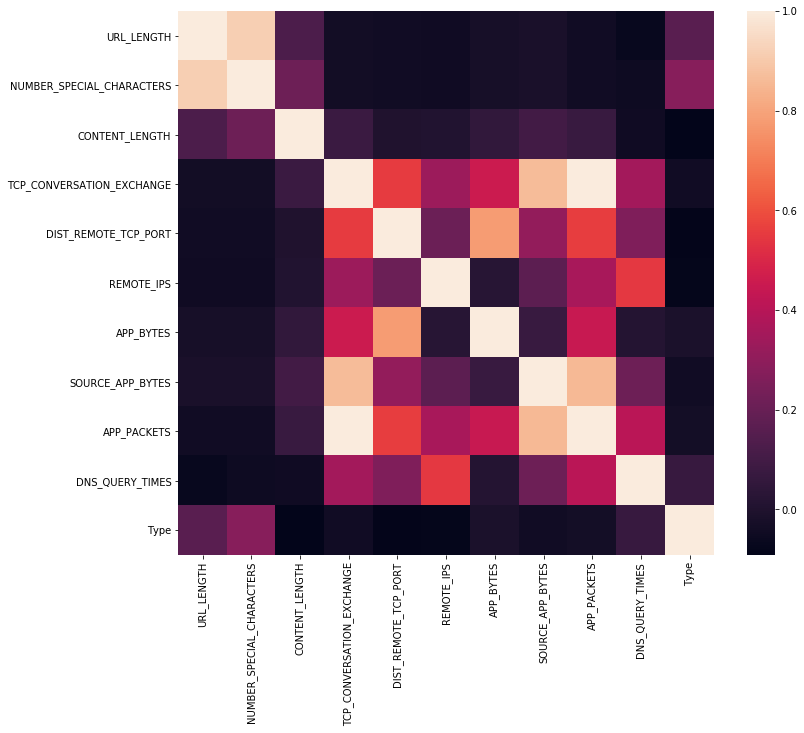

In [11]:
# Your comment here
websites.drop(["SOURCE_APP_PACKETS"], axis = 1, inplace = True)

plt.figure(figsize=(12,10))
sns.heatmap(websites.corr())

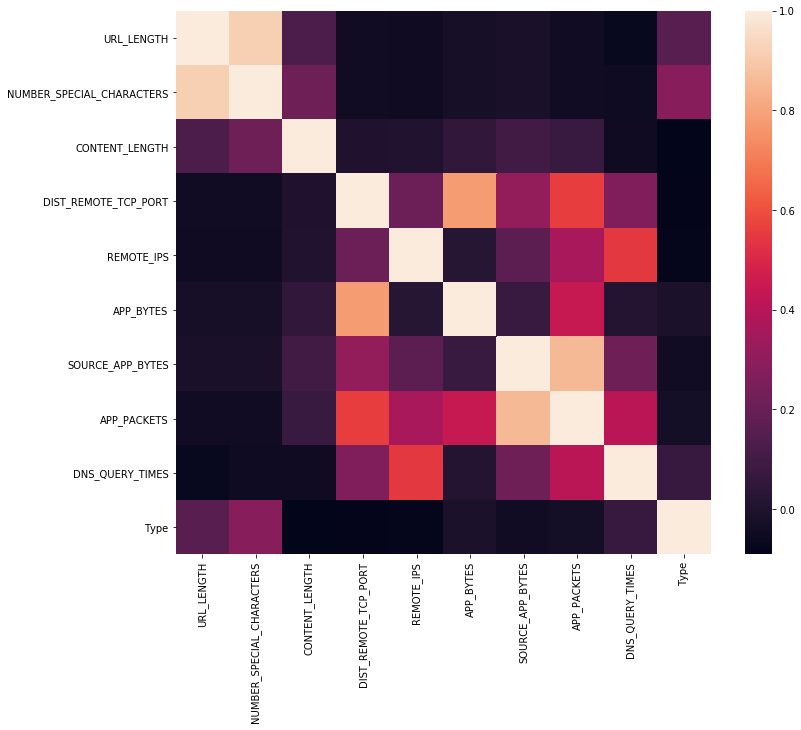

In [12]:
# Your comment here
websites.drop(["TCP_CONVERSATION_EXCHANGE"], axis = 1, inplace = True)

plt.figure(figsize=(12,10))
sns.heatmap(websites.corr())

In [13]:
# Print heatmap again


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [14]:
# Your code here
nulls_cols = websites.isnull().sum()
nulls_cols[nulls_cols>0]

SERVER               1
CONTENT_LENGTH     812
DNS_QUERY_TIMES      1
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
# Your code here
websites["CONTENT_LENGTH"].isnull().sum()/websites["CONTENT_LENGTH"].shape[0]

0.45592363840539024

In [16]:
# Your comment here
websites.drop(["CONTENT_LENGTH"], axis = 1, inplace = True)

In [17]:
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [18]:
# Examine missing values in each column
nulls_cols2 = websites.isnull().sum()
nulls_cols2[nulls_cols2>0]

Series([], dtype: int64)

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [19]:
# Your code here

def consolidate_country(x):
    dict = {
        "[u'GB'; u'UK']": "GB",
        "United Kingdom": "GB",
        "Cyprus": "CY",
        "us": "US",
        "se": "SE",
        "ru": "RU"
    }
    
    return dict.get(x,x)
    
websites["WHOIS_COUNTRY"]=websites["WHOIS_COUNTRY"].apply(consolidate_country)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [20]:
# Your code here
websites["WHOIS_COUNTRY"].value_counts()

US      1105
None     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
CN        10
UK        10
IN        10
FR         9
CZ         9
RU         6
CH         6
NL         6
KR         5
AT         4
BS         4
SE         4
PH         4
KY         3
DE         3
TR         3
SC         3
BE         3
HK         3
CY         2
UY         2
NO         2
KG         2
SI         2
IL         2
UA         2
BR         2
AE         1
LV         1
IT         1
PK         1
BY         1
LU         1
IE         1
UG         1
TH         1
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [21]:
# Your code here
def make_other(x):
    if not x in websites["WHOIS_COUNTRY"].value_counts()[:10].index:
        return "OTHER"
    else:
        return x
    
websites["WHOIS_COUNTRY"]=websites["WHOIS_COUNTRY"].apply(make_other)
websites["WHOIS_COUNTRY"].value_counts()

US       1105
None      306
OTHER     110
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
CN         10
UK         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [22]:
# Your code here
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis = 1, inplace = True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [23]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [24]:
# Your code here
websites["URL"].value_counts()

M0_121     1
B0_500     1
B0_672     1
B0_560     1
B0_1315    1
B0_894     1
B0_1129    1
B0_276     1
B0_93      1
B0_115     1
B0_2276    1
B0_307     1
B0_653     1
B0_66      1
B0_2298    1
B0_151     1
M4_54      1
B0_132     1
B0_642     1
B0_959     1
M4_49      1
B0_2091    1
B0_2008    1
B0_767     1
B0_1138    1
B0_1198    1
B0_420     1
B0_2198    1
B0_317     1
M0_122     1
          ..
B0_1222    1
B0_1116    1
B0_238     1
B0_1364    1
B0_1279    1
B0_975     1
B0_214     1
B0_1246    1
M0_56      1
B0_1163    1
B0_378     1
B0_850     1
B0_232     1
B0_2113    1
B0_314     1
B0_397     1
B0_1382    1
B0_1153    1
B0_956     1
B0_1379    1
B0_391     1
B0_1089    1
B0_819     1
B0_2301    1
B0_1236    1
B0_462     1
B0_2040    1
B0_2078    1
B0_2092    1
B0_1148    1
Name: URL, Length: 1779, dtype: int64

In [25]:
websites.drop(['URL'], axis = 1, inplace = True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [26]:
# Your code here
websites["CHARSET"].value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
ISO-8859          1
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [27]:
# Your code here
websites["SERVER"].value_counts()

Apache                                                                                                                                                         385
nginx                                                                                                                                                          211
None                                                                                                                                                           175
Microsoft-HTTPAPI/2.0                                                                                                                                          113
cloudflare-nginx                                                                                                                                                94
Microsoft-IIS/7.5                                                                                                                                               51
Server                

![Think Hard](../think-hard.jpg)

In [28]:
# Your comment here
# Hay muchos valores en SERVER, pero la mayoría son Apache o nginx

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [29]:
# Your code here
def consolidate_server(x):
    if "microsoft" in x.lower():
        return "Microsoft"
    elif "apache" in x.lower():
        return "Apache"
    elif "nginx" in x.lower():
        return "nginx"
    else:
        return "Other"
    
websites["SERVER"]=websites["SERVER"].apply(consolidate_server)
websites["SERVER"].value_counts()

Apache       642
Other        503
nginx        436
Microsoft    198
Name: SERVER, dtype: int64

In [30]:
# Count `SERVER` value counts here


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [31]:
# Your code here
website_dummy = pd.concat([pd.get_dummies(websites["SERVER"],drop_first=True),\
                           pd.get_dummies(websites["CHARSET"],drop_first=True),\
                           pd.get_dummies(websites["WHOIS_COUNTRY"],drop_first=True),\
                           websites], axis = 1, sort=False)

In [32]:
website_dummy.drop(['SERVER', 'CHARSET', 'WHOIS_COUNTRY'], axis = 1, inplace = True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [33]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 30 columns):
Microsoft                    1779 non-null uint8
Other                        1779 non-null uint8
nginx                        1779 non-null uint8
ISO-8859-1                   1779 non-null uint8
None                         1779 non-null uint8
UTF-8                        1779 non-null uint8
iso-8859-1                   1779 non-null uint8
us-ascii                     1779 non-null uint8
utf-8                        1779 non-null uint8
windows-1251                 1779 non-null uint8
windows-1252                 1779 non-null uint8
CA                           1779 non-null uint8
CN                           1779 non-null uint8
ES                           1779 non-null uint8
GB                           1779 non-null uint8
JP                           1779 non-null uint8
None                         1779 non-null uint8
OTHER                        1779 non-null uint8
PA         

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [34]:
target = website_dummy["Type"]
website_dummy.drop(['Type'], axis = 1, inplace = True)

In [35]:
from sklearn.model_selection import train_test_split

# Your code here:

X_train, X_test, y_train, y_test = train_test_split(website_dummy, target, test_size=0.20, random_state=35)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [36]:
# Your code here:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state=0, solver='liblinear')

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [37]:
# Your code here:

model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [65]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model_logistic.predict(X_test)

print(confusion_matrix(y_test, y_pred, labels=[0, 1]))
print(accuracy_score(y_test, y_pred))

[[320   2]
 [ 24  10]]
0.9269662921348315


What are your thoughts on the performance of the model? Write your conclusions below.

Considero que nos interesa más tener pocos falsos negativos. Preferimos categorizar las webs maliciosas como maliciosas.

No tiene mala **exactitud**, pero realmente no está predeciendo bien los "1". De 34 "1" que había ha clasificado 10 bien y 24 mal (como "0"). Como el objetivo es encontrar 1, el modelo no predice muy bien. Tiene en entorno un 30% de acierto.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [40]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model_neigh = KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [66]:
# Your code here:

model_neigh.fit(X_train, y_train)

y_pred_neigh = model_neigh.predict(X_test)

print(confusion_matrix(y_test, y_pred_neigh, labels=[0, 1]))
print(accuracy_score(y_test, y_pred_neigh))

[[300  22]
 [ 11  23]]
0.9073033707865169


Aunque el accuracy es peor, ha predecido mejor los "1", por lo que el modelo KNN es mejor (aunque tampoco es muy muy bueno). Tiene entorno un 68% de acierto.

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [42]:
# Your code here:

model_neigh_5 = KNeighborsClassifier(n_neighbors=5)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [67]:
# Your conclusions here:

model_neigh_5.fit(X_train, y_train)

y_pred_neigh_5 = model_neigh_5.predict(X_test)

print(confusion_matrix(y_test, y_pred_neigh_5, labels=[0, 1]))
print(accuracy_score(y_test, y_pred_neigh_5))

[[305  17]
 [ 13  21]]
0.9157303370786517


Ha mejorado el accuracy pero ha predecido pero los 1.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [68]:
# Your code here

from sklearn.preprocessing import RobustScaler

website_rescaled = website_dummy[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS", \
"APP_BYTES", "SOURCE_APP_BYTES", "APP_PACKETS", "DNS_QUERY_TIMES"]]

website_rescaled = pd.DataFrame(RobustScaler().fit_transform(website_rescaled))

website_rescaled = pd.concat([website_rescaled, website_dummy.drop(["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS",\
    "DIST_REMOTE_TCP_PORT", "REMOTE_IPS", "APP_BYTES", "SOURCE_APP_BYTES", "APP_PACKETS", "DNS_QUERY_TIMES"], axis = 1).reset_index()]\
    , axis = 1, sort=False)

X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(website_rescaled, target, test_size=0.20, random_state=35)

model_logistic_rs = LogisticRegression(random_state=0, solver='liblinear')

model_logistic_rs.fit(X_train_rs, y_train_rs)

y_pred_rs = model_logistic_rs.predict(X_test_rs)

print(confusion_matrix(y_test_rs, y_pred_rs, labels=[0, 1]))
print(accuracy_score(y_test_rs, y_pred_rs))

[[318   4]
 [ 17  17]]
0.9410112359550562


Ha mejorado tanto el accuracy como la predicción de 1. Ha acertado el 50% de los "1", por lo que, aún así, sigue siendo peor que el KNN.